Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
number_of_points = 1000
x_point = []
y_point = []

In [3]:
a = 0.22
b = 0.78

In [4]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

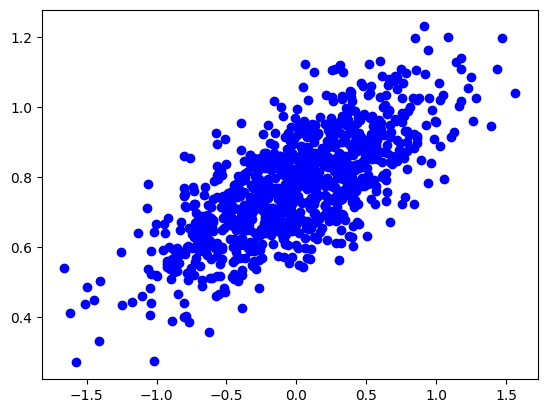

In [5]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [6]:
real_x = np.array(x_point)
real_y = np.array(y_point)

**Batch Stochastic Gradient Descent** - wykorzystujemy **cały zbiór danych**

Definicja błędu:

In [7]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [8]:
import random

In [9]:
Loss = []
epochs = 50
learning_rate = 0.5

a = tf.Variable(random.random())
b = tf.Variable(random.random())

for _ in range(epochs):

  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())
    grad_a, grad_b = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*grad_a)
  b.assign_sub(learning_rate*grad_b)

In [10]:
np.max(Loss),np.min(Loss)

(0.46536347, 0.010647854)

In [11]:
print(a.numpy())
print(b.numpy())

0.21146111
0.77722245


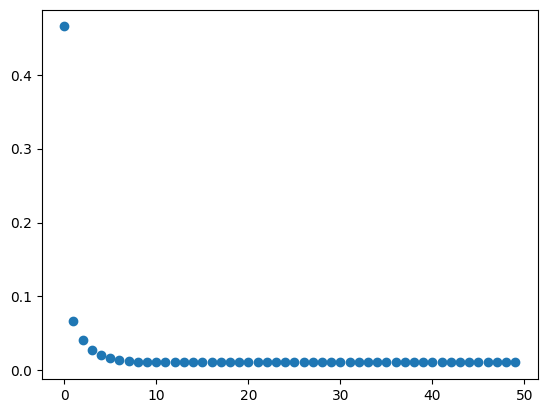

In [12]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [13]:
max = np.max(x_point)
min = np.min(x_point)

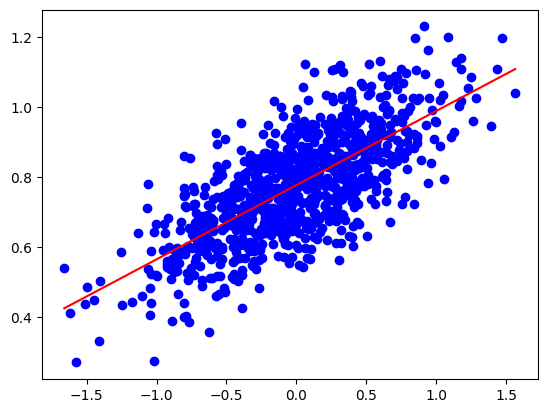

In [14]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()

**Mini-batch Stochastic Gradient Descent** - wykorzystujemy **część zbióru danych**

In [15]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
np.random.shuffle(arr)
arr

array([9, 7, 5, 2, 8, 4, 6, 3, 1, 0])

In [17]:
def subset_dataset(x_dataset, y_dataset, subset_size):
    arr = np.arange(len(x_dataset))
    np.random.shuffle(arr)
    x_train = x_dataset[arr[0:subset_size]]
    y_train = y_dataset[arr[0:subset_size]]
    return x_train,y_train

In [18]:
print(subset_dataset(real_x, real_y, 10))

(array([-4.10521470e-01, -2.20186270e-01,  5.14311175e-01, -2.26615236e-01,
       -1.41547923e-01,  9.39345391e-01, -2.88279733e-04,  9.90049207e-02,
       -3.21789635e-01,  7.19462361e-01]), array([0.76531039, 0.70135464, 1.03353956, 0.67990202, 0.6806094 ,
       1.16389016, 0.66252164, 0.71296315, 0.82910881, 1.05040234]))


TODO:

In [21]:
Loss = []
epochs = 1000
learning_rate = 0.2
batch_size = 200     #wielkość zbioru wykorzystanego do treningu

a = tf.Variable(random.random())
b = tf.Variable(random.random())

for i in range(epochs):

  real_x_batch, real_y_batch = subset_dataset(real_x,real_y,batch_size)

  with tf.GradientTape() as tape:
    pred_y = a * real_x_batch + b
    loss = loss_fn(real_y_batch, pred_y)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db



Wykres zmian błędu:

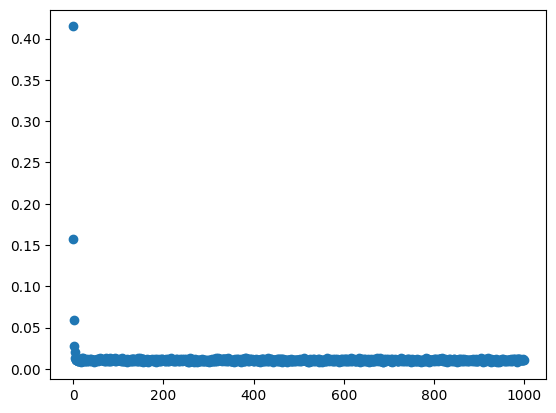

In [23]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [24]:
max = np.max(x_point)
min = np.min(x_point)

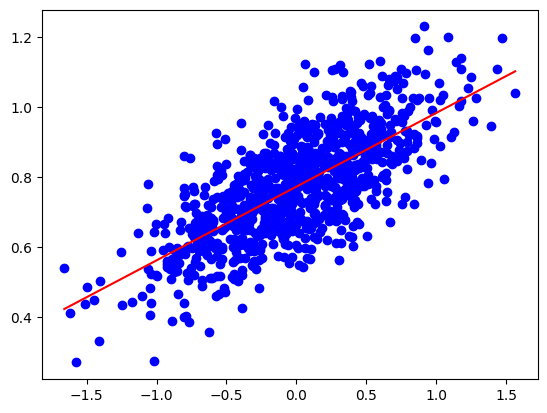

In [25]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()